### 3. Multiple Linear Regression

In [1]:
# Load all Libraries/Datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


ds1 = pd.read_csv( "gt_2011.csv" )
ds2 = pd.read_csv( "gt_2012.csv" )
ds3 = pd.read_csv( "gt_2013.csv" )
ds4 = pd.read_csv( "gt_2014.csv" )
ds5 = pd.read_csv( "gt_2015.csv" )

# Concatenate all dataframes
frames = [ ds1, ds2, ds3, ds4, ds5 ]
merged_ds = pd.concat( frames )

# Saving merged ds into a separate .csv file for ease
pd.DataFrame.to_csv( merged_ds, "CombinedDataSet.csv", index=False )

# Split the data into training ( 80 % ) and test set ( 20 % )
x = merged_ds.iloc[ :, [ 0, 1, 2, 3, 4, 5, 6, 8 ] ].values
y = merged_ds.iloc[ :, [ 7, 9, 10 ] ].values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2 )
merged_ds.head( )

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [3]:
# 1. Use your top 4 features selected in part 1 for each target value, and build a multiple linear
# regression model for each of the following target values. (Note: Linear regression model of
# sklearn doesn’t need data scaling):
# a. Turbine energy yield (TEY)
# b. NOX (NOX)

# Recall from Part 1, the top 4 features for each target value is as follows:
    
# Turbine Energy Yield ( TEY )
#     Compressor Discharge Pressure ( CDP ), Pearson’s Coefficient = 0.988
#     Gas Turbine Exhaust Pressure ( GTEP ), Pearson’s Coefficient = 0.964
#     Turbine Inlet Temperature ( TIT ), Pearson’s Coefficient = 0.910
#     Turbine After Temperature ( TAT ), Pearson’s Coefficient = 0.665

# Nitrogen Oxides ( NOX )
#     Ambient Temperature ( AT ), Pearson’s Coefficient = -0.558  
#     Turbine Inlet Temperature ( TIT ), Pearson’s Coefficient = -0.214
#     Gas Turbine Exhaust Pressure ( GTEP ), Pearson’s Coefficient = -0.202
#     Ambient Pressure ( AP ), Pearson’s Coefficient = 0.192

mult_lin_reg_TEY_4_feat = LinearRegression( )
mult_lin_reg_NOX_4_feat = LinearRegression( )

x1_train_TEY_4_feat = x_train[ :, [ 4, 5, 6, 7 ] ]
x1_test_TEY_4_feat = x_test[ :, [ 4, 5, 6, 7 ]  ]
y1_train_TEY_4_feat = y_train[ :, 0 ]
y1_test_TEY_4_feat = y_test[ :, 0 ]

x1_train_NOX_4_feat = x_train[ :, [ 0, 1, 4, 5 ] ]
x1_test_NOX_4_feat = x_test[ :, [ 0, 1, 4, 5 ] ]
y1_train_NOX_4_feat = y_train[ :, 2 ]
y1_test_NOX_4_feat = y_test[ :, 2 ]

mult_lin_reg_TEY_4_feat.fit( x1_train_TEY_4_feat, y1_train_TEY_4_feat )
mult_lin_reg_NOX_4_feat.fit( x1_train_NOX_4_feat, y1_train_NOX_4_feat )



LinearRegression()

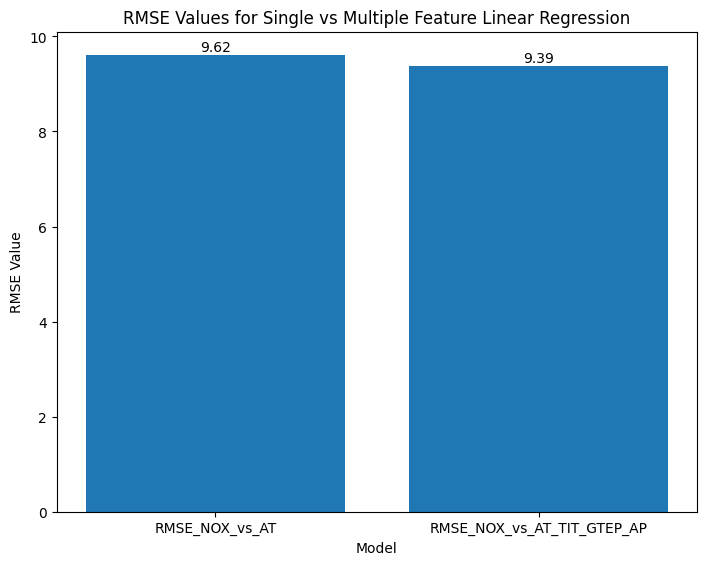

In [9]:
# 2. Evaluate these models on the test set and report the results by providing R2 and RMSE
# and two bar charts containing RMSE values of current model and the single feature model
# you trained before. (15 points)

y1_test_TEY_4_feat_pred = mult_lin_reg_TEY_4_feat.predict( x1_test_TEY_4_feat )
y1_test_NOX_4_feat_pred = mult_lin_reg_NOX_4_feat.predict( x1_test_NOX_4_feat )

r2_score_TEY_4_feat = r2_score( y1_test_TEY_4_feat, y1_test_TEY_4_feat_pred )
r2_score_NOX_4_feat = r2_score( y1_test_NOX_4_feat, y1_test_NOX_4_feat_pred )

rmse_TEY_4_feat = math.sqrt( mean_squared_error( y1_test_TEY_4_feat, y1_test_TEY_4_feat_pred ) )
rmse_NOX_4_feat = math.sqrt( mean_squared_error( y1_test_NOX_4_feat, y1_test_NOX_4_feat_pred ) )

results = pd.DataFrame( {
    "Model":[ "TEY 4 Features", "NOX 4 Features" ],
    "R2 Score":[ r2_score_TEY_4_feat, r2_score_NOX_4_feat ],
    "RMSE":[ rmse_TEY_4_feat, rmse_NOX_4_feat ]
})
results.head( )



############################### Bar Chart for RMSE Values of TEY #########################################

# rmse_TEY_vs_CDP_from_part2 = 2.334806 # RMSE of TEY vs CDP from Part 2, value can be found in Part2 of report

# rmse_split_values = [rmse_TEY_vs_CDP_from_part2, rmse_TEY_4_feat]
# labels = ["RMSE_TEY_vs_CDP", "RMSE_TEY_vs_CDP_GTEP_TIT_AT"]

# barfigure = plt.figure()
# axis = barfigure.add_axes([0, 0, 1, 1])
# bars = axis.bar(labels, rmse_split_values)

# # Adding text labels to each bar
# for bar in bars:
#     yval = bar.get_height()
#     axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# plt.title("RMSE Values for Single vs Multiple Feature Linear Regression")
# plt.ylabel("RMSE Value")
# plt.xlabel("Model")
# plt.show()



############################### Bar Chart for RMSE Values of NOX #########################################

rmse_NOX_vs_AT_From_Part2 = 9.618380 # RMSE of TEY vs CDP from Part 2, value can be found in Part2 of report

rmse_split_values = [rmse_NOX_vs_AT_From_Part2, rmse_NOX_4_feat ]
labels = ["RMSE_NOX_vs_AT", "RMSE_NOX_vs_AT_TIT_GTEP_AP"]

barfigure = plt.figure()
axis = barfigure.add_axes([0, 0, 1, 1])
bars = axis.bar(labels, rmse_split_values)

# Adding text labels to each bar
for bar in bars:
    yval = bar.get_height()
    axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title("RMSE Values for Single vs Multiple Feature Linear Regression")
plt.ylabel("RMSE Value")
plt.xlabel("Model")
plt.show()

In [12]:
# 3. Now, use all features (F1 to F8) to build a multiple linear regression model to predict each
# of the targets above.

mult_lin_reg_TEY_all_feat = LinearRegression( )
mult_lin_reg_NOX_all_feat = LinearRegression( )

y1_train_TEY_all_feat = y_train[ :, 0 ]
y1_test_TEY_all_feat = y_test[ :, 0 ]
y1_train_NOX_all_feat = y_train[ :, 2 ]
y1_test_NOX_all_feat = y_test[ :, 2 ]

mult_lin_reg_TEY_all_feat.fit( x_train, y1_train_TEY_all_feat )
mult_lin_reg_NOX_all_feat.fit( x_train, y1_train_NOX_all_feat )

LinearRegression()

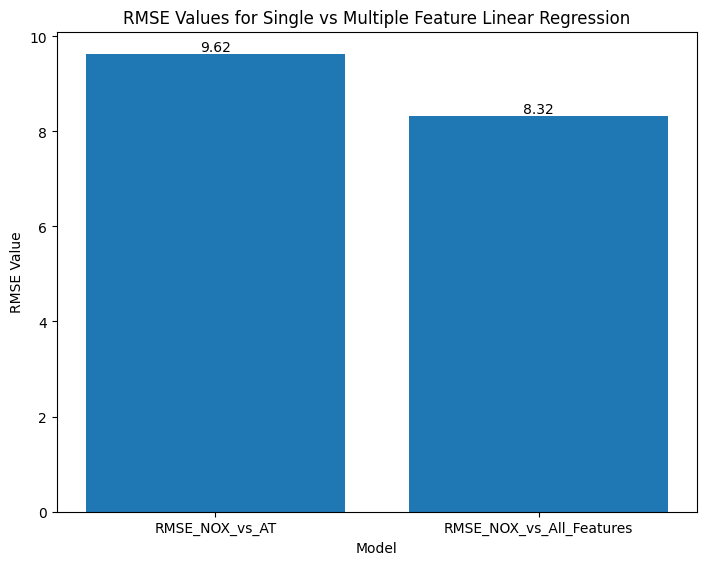

In [26]:
# 4. Evaluate these models on the test set and report the results by providing R2 and RMSE
# and a bar chart containing RMSE values of this model and the single feature model you
# trained before. (10 points)

y1_test_TEY_all_feat_pred = mult_lin_reg_TEY_all_feat.predict( x_test )
y1_test_NOX_all_feat_pred = mult_lin_reg_NOX_all_feat.predict( x_test )

r2_score_TEY_all_feat = r2_score( y1_test_TEY_all_feat, y1_test_TEY_all_feat_pred )
r2_score_NOX_all_feat = r2_score( y1_test_NOX_all_feat, y1_test_NOX_all_feat_pred )

rmse_TEY_all_feat = math.sqrt( mean_squared_error( y1_test_TEY_all_feat, y1_test_TEY_all_feat_pred ) )
rmse_NOX_all_feat = math.sqrt( mean_squared_error( y1_test_NOX_all_feat, y1_test_NOX_all_feat_pred ) )

results = pd.DataFrame( {
    "Model":[ "TEY vs all Features", "NOX vs all Features" ],
    "R2 Score":[ r2_score_TEY_all_feat, r2_score_NOX_all_feat ],
    "RMSE":[ rmse_TEY_all_feat, rmse_NOX_all_feat ]
})
results.head( )



############################### Bar Chart for RMSE Values of TEY #########################################

# rmse_TEY_vs_CDP_from_part2 = 2.334806 # RMSE of TEY vs CDP from Part 2, value can be found in Part2 of report

# rmse_split_values = [rmse_TEY_vs_CDP_from_part2, rmse_TEY_all_feat]
# labels = ["RMSE_TEY_vs_CDP", "RMSE_TEY_vs_All_Features"]

# barfigure = plt.figure()
# axis = barfigure.add_axes([0, 0, 1, 1])
# bars = axis.bar(labels, rmse_split_values)

# # Adding text labels to each bar
# for bar in bars:
#     yval = bar.get_height()
#     axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# plt.title("RMSE Values for Single vs Multiple Feature Linear Regression")
# plt.ylabel("RMSE Value")
# plt.xlabel("Model")
# plt.show()



############################### Bar Chart for RMSE Values of NOX #########################################

rmse_NOX_vs_AT_From_Part2 = 9.618380 # RMSE of TEY vs CDP from Part 2, value can be found in Part2 of report

rmse_split_values = [rmse_NOX_vs_AT_From_Part2, rmse_NOX_all_feat ]
labels = ["RMSE_NOX_vs_AT", "RMSE_NOX_vs_All_Features"]

barfigure = plt.figure()
axis = barfigure.add_axes([0, 0, 1, 1])
bars = axis.bar(labels, rmse_split_values)

# Adding text labels to each bar
for bar in bars:
    yval = bar.get_height()
    axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title("RMSE Values for Single vs Multiple Feature Linear Regression")
plt.ylabel("RMSE Value")
plt.xlabel("Model")
plt.show()

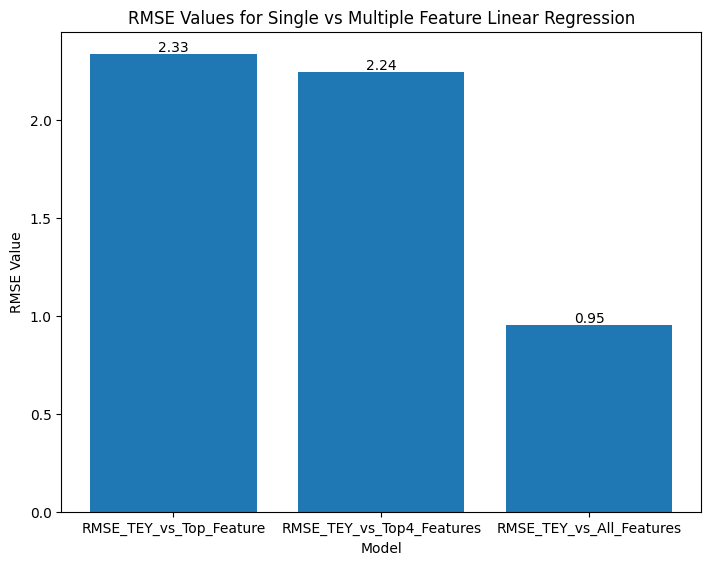

In [25]:
# 5. Does employing more features to train the ML model improve performance? (Hint:
# Create a barchart of RMSE of single and multiple regression to prove your point)
# (5 points)

rmse_TEY_vs_CDP_from_part2 = 2.334806 # RMSE of TEY vs CDP from Part 2, value can be found in Part2 of report

rmse_split_values = [rmse_TEY_vs_CDP_from_part2, rmse_TEY_4_feat, rmse_TEY_all_feat]
labels = ["RMSE_TEY_vs_Top_Feature", "RMSE_TEY_vs_Top4_Features", "RMSE_TEY_vs_All_Features"]

barfigure = plt.figure()
axis = barfigure.add_axes([0, 0, 1, 1])
bars = axis.bar(labels, rmse_split_values)

# Adding text labels to each bar
for bar in bars:
    yval = bar.get_height()
    axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title("RMSE Values for Single vs Multiple Feature Linear Regression")
plt.ylabel("RMSE Value")
plt.
plt.xlabel("Model")
plt.show()